<a href="https://colab.research.google.com/github/firelina/HSE_Perm_tasks/blob/main/Result1_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка данных

In [ ]:
!wget https://lodmedia.hb.bizmrg.com/case_files/1051022/train_dataset_train_data.zip -O data.zip && unzip -q data.zip
!pip install cvlib


--2023-11-12 06:55:15--  https://lodmedia.hb.bizmrg.com/case_files/1051022/train_dataset_train_data.zip
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 95.163.53.117
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|95.163.53.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10036376089 (9.3G) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   9.35G  22.5MB/s    in 7m 13s  

2023-11-12 07:02:30 (22.1 MB/s) - ‘data.zip’ saved [10036376089/10036376089]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046370 sha256=9d3bd87c7449e81bf8709f60a5ae3a5d2653ca1e30f464cb26da75cba6b68689
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar

In [ ]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fh = pd.read_excel('Коблик/nine_hour_video/Labels.xlsx')
fh

,левое рабочее место,Unnamed: 1,Unnamed: 2,правое рабочее место,Unnamed: 4
0,время,вид работы,NaN,время,вид работы
1,00:00:00,простой,NaN,00:00:00,простой
2,00:04:00,вынужденная,NaN,00:07:00,вынужденная
3,00:10:00,сварка,NaN,00:09:38,сварка
4,00:21:14,вынужденная,NaN,00:22:00,вынужденная
...,...,...,...,...,...
87,NaN,NaN,NaN,08:24:38,сварка
88,NaN,NaN,NaN,08:26:11,вынужденная
89,NaN,NaN,NaN,08:28:41,простой
90,NaN,NaN,NaN,08:31:10,вынужденная


In [ ]:
left = pd.DataFrame(columns=['time', 'metrik'], data=fh.iloc[:,[0, 1]].values).iloc[1:,:].dropna()
left

,time,metrik
1,00:00:00,простой
2,00:04:00,вынужденная
3,00:10:00,сварка
4,00:21:14,вынужденная
5,00:26:10,сварка
...,...,...
65,05:23:40,простой
66,05:30:01,вынужденная
67,05:56:01,простой
68,07:10:35,перерыв


In [ ]:
right = fh.iloc[:, [3, 4]].dropna().rename(columns={fh.columns[3]: 'time', fh.columns[4]: 'metrik'}).iloc[1:, :]
right

,time,metrik
1,00:00:00,простой
2,00:07:00,вынужденная
3,00:09:38,сварка
4,00:22:00,вынужденная
5,00:24:13,сварка
...,...,...
87,08:24:38,сварка
88,08:26:11,вынужденная
89,08:28:41,простой
90,08:31:10,вынужденная


Достаем картинки из видео по меткам (картинка целиком)

In [ ]:
import cv2
import os

# Путь к видеофайлу
video_path = 'Коблик/five_hour_video/Video.mp4'

# Папка для сохранения извлеченных кадров
output_folder = '/content/output_images'
os.makedirs(output_folder, exist_ok=True)

from datetime import datetime, time

# Открываем видеофайл
cap = cv2.VideoCapture(video_path)

# Функция для извлечения и сохранения кадра по временной метке
def extract_frame(video_path, output_folder, time_stamp, class_name):
    # Конвертируем временную метку в объект datetime
    time_in_seconds = pd.to_datetime(str(time_stamp)).time()
    datetime_obj = datetime.combine(datetime.today(), time_in_seconds)

    # Получаем время в секундах
    time_in_seconds = (datetime_obj - datetime(datetime_obj.year, datetime_obj.month, datetime_obj.day)).total_seconds()

    # Конвертируем в количество кадров
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    frame_number = int(time_in_seconds * frame_rate)

    # Перемещаемся к нужному кадру
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Считываем кадр
    ret, frame = cap.read()

    # Сохраняем кадр в папку с соответствующим классом
    file_name = f'{class_name}_{time_stamp}.jpg'
    file_path = os.path.join(output_folder, file_name)
    cv2.imwrite(file_path, frame)

    # Закрываем видеофайл
    cap.release()

# # Используем полученные временные метки для извлечения и сохранения кадров
# for index, row in left.iterrows():
#     extract_frame(video_path, output_folder, row['time'], row['metrik'])

# for index, row in right.iterrows():
#     extract_frame(video_path, output_folder, row['time'], row['metrik'])
from tqdm import tqdm
# Используем tqdm для отслеживания прогресса
left_length = len(left)
right_length = len(right)

for index, row in tqdm(enumerate(left.iterrows()), total=left_length, desc='Left loop'):
    extract_frame(video_path, output_folder, row[1]['time'], row[1]['metrik'])

for index, row in tqdm(enumerate(right.iterrows()), total=right_length, desc='Right loop'):
    extract_frame(video_path, output_folder, row[1]['time'], row[1]['metrik'])

Сохранение изображений с делением пополам (для левой сохраняем левую часть изображения и для правой соответственно)
Если не сработает, то запуск предыдущей ячейки

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import datetime as dt

# Определите путь к видеофайлу и папку для сохранения изображений
video_path = 'Коблик/five_hour_video/Video.mp4'
output_folder = '/content/output_images'
os.makedirs(output_folder, exist_ok=True)

# Откройте видеофайл
cap = cv2.VideoCapture(video_path)

# Определите размер изображения
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Функция для извлечения и сохранения кадра по временной метке
def extract_frame(video_path, output_folder, time_stamp, class_name, crop_left=True):
    # Конвертируем временную метку в объект datetime
    time_in_seconds = pd.to_datetime(str(time_stamp)).time()
    datetime_obj = dt.datetime.combine(dt.datetime.today(), time_in_seconds)

    # Получаем время в секундах
    time_in_seconds = (datetime_obj - dt.datetime(datetime_obj.year, datetime_obj.month, datetime_obj.day)).total_seconds()

    # Конвертируем в количество кадров
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    frame_number = int(time_in_seconds * frame_rate)

    # Перемещаемся к нужному кадру
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Считываем кадр
    ret, frame = cap.read()

    # Проверяем, что кадр успешно считан
    if not ret:
        print(f"Не удалось прочитать кадр для временной метки {time_stamp}")
        return

    # Обрезаем изображение
    if crop_left:
        frame = frame[:, :frame_width // 2]
    else:
        frame = frame[:, frame_width // 2:]

    # Сохраняем кадр в папку с соответствующим классом
    file_name = f'{class_name}_{time_stamp}.jpg'
    file_path = os.path.join(output_folder, file_name)
    cv2.imwrite(file_path, frame)

# Используем tqdm для отслеживания прогресса
left_length = len(left)
right_length = len(right)

for index, row in tqdm(enumerate(left.iterrows()), total=left_length, desc='Left loop'):
    extract_frame(video_path, output_folder, row[1]['time'], row[1]['metrik'], crop_left=True)

for index, row in tqdm(enumerate(right.iterrows()), total=right_length, desc='Right loop'):
    extract_frame(video_path, output_folder, row[1]['time'], row[1]['metrik'], crop_left=False)

# Закрываем видеофайл
cap.release()


Left loop:  43%|████▎     | 30/69 [01:02<01:42,  2.63s/it]

Не удалось прочитать кадр для временной метки 02:09:30


Left loop:  46%|████▋     | 32/69 [24:23<3:20:17, 324.79s/it]

Не удалось прочитать кадр для временной метки 02:16:34


Left loop:  48%|████▊     | 33/69 [24:28<2:27:15, 245.43s/it]

Не удалось прочитать кадр для временной метки 02:38:47


Попытка сохранить обе части по одной временной метке с поиском для второй части картинки из второго набора(не уверена, что рабтоает - не запускала)

In [ ]:
# import cv2
# import os
# import pandas as pd
# from tqdm import tqdm
# import datetime as dt

# # Определите путь к видеофайлу и папку для сохранения изображений
# video_path = 'Коблик/five_hour_video/Video.mp4'
# output_folder = '/content/output_images'
# os.makedirs(output_folder, exist_ok=True)

# # Откройте видеофайл
# cap = cv2.VideoCapture(video_path)

# # Определите размер изображения
# frame_width = int(cap.get(3))
# frame_height = int(cap.get(4))

# # Функция для извлечения и сохранения кадра по временной метке
# def extract_frame(video_path, output_folder, time_stamp, class_name_left, class_name_right):
#     # Конвертируем временную метку в объект datetime
#     time_in_seconds = pd.to_datetime(str(time_stamp)).time()
#     datetime_obj = dt.datetime.combine(dt.datetime.today(), time_in_seconds)

#     # Получаем время в секундах
#     time_in_seconds = (datetime_obj - dt.datetime(datetime_obj.year, datetime_obj.month, datetime_obj.day)).total_seconds()

#     # Конвертируем в количество кадров
#     frame_rate = cap.get(cv2.CAP_PROP_FPS)
#     frame_number = int(time_in_seconds * frame_rate)

#     # Перемещаемся к нужному кадру
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

#     # Считываем кадр
#     ret, frame = cap.read()

#     # Проверяем, что кадр успешно считан
#     if not ret:
#         print(f"Не удалось прочитать кадр для временной метки {time_stamp}")
#         return

#     # Обрезаем изображение и сохраняем левую часть
#     frame_left = frame[:, :frame_width // 2]
#     file_name_left = f'{class_name_left}_{time_stamp}.jpg'
#     file_path_left = os.path.join(output_folder, file_name_left)
#     cv2.imwrite(file_path_left, frame_left)

#     # Обрезаем изображение и сохраняем правую часть с меткой из right
#     frame_right = frame[:, frame_width // 2:]
#     file_name_right = f'{class_name_right}_{time_stamp}.jpg'
#     file_path_right = os.path.join(output_folder, file_name_right)
#     cv2.imwrite(file_path_right, frame_right)

# # Используем tqdm для отслеживания прогресса
# left_length = len(left)
# right_length = len(right)

# for index, row in tqdm(enumerate(left.iterrows()), total=left_length, desc='Left loop'):
#     time_stamp = row[1]['time']
#     class_name_left = row[1]['metrik']

#     # Найдем соответствующую временную метку в right
#     corresponding_row = right[right['time'] == time_stamp]
#     if not corresponding_row.empty:
#         class_name_right = corresponding_row['metrik'].values[0]
#     else:
#         class_name_right = 'нет метки'  # Можно задать другое значение по умолчанию

#     extract_frame(video_path, output_folder, time_stamp, class_name_left, class_name_right)

# for index, row in tqdm(enumerate(right.iterrows()), total=right_length, desc='Right loop'):
#     time_stamp = row[1]['time']
#     class_name_right = row[1]['metrik']

#     # Найдем соответствующую временную метку в left
#     corresponding_row = left[left['time'] == time_stamp]
#     if not corresponding_row.empty:
#         class_name_left = corresponding_row['metrik'].values[0]
#     else:
#         class_name_left = 'нет метки'  # Можно задать другое значение по умолчанию

#     extract_frame(video_path, output_folder, time_stamp, class_name_left, class_name_right)

# # Закрываем видеофайл
# cap.release()


Сохранение на диске датасета картинок

In [ ]:
from google.colab import drive
import shutil
drive.mount('/content/drive')

output_drive_folder = '/content/drive/MyDrive/Your_Folder_Name'
os.makedirs(output_drive_folder, exist_ok=True)

shutil.copytree(output_folder, output_drive_folder)

**Разделение на трейн, тест**

In [ ]:
from sklearn.model_selection import train_test_split
import shutil

# Папка для сохранения тренировочных и тестовых данных
train_folder = '/content/train_data'
test_folder = '/content/test_data'

# Создание папок для тренировочных и тестовых данных
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Получение списка всех файлов в папке
all_files = os.listdir(output_folder)

# Перемешивание данных
np.random.shuffle(all_files)

# Определение количества файлов для тренировочного и тестового набора
train_size = int(0.8 * len(all_files))
test_size = len(all_files) - train_size

# Разделение данных на тренировочный и тестовый наборы
train_files, test_files = train_test_split(all_files, test_size=test_size, random_state=42)

# Перемещение файлов в соответствующие папки
for file in tqdm(train_files, desc='Moving to Train Folder'):
    label = file.split('_')[0]  # Извлекаем метку класса из имени файла
    class_folder = os.path.join(train_folder, label)
    os.makedirs(class_folder, exist_ok=True)
    shutil.copyfile(os.path.join(output_folder, file), os.path.join(class_folder, file))

for file in tqdm(test_files, desc='Moving to Test Folder'):
    label = file.split('_')[0]  # Извлекаем метку класса из имени файла
    class_folder = os.path.join(test_folder, label)
    os.makedirs(class_folder, exist_ok=True)
    shutil.copyfile(os.path.join(output_folder, file), os.path.join(class_folder, file))


Moving to Test Folder: 100%|██████████| 31/31 [00:00<00:00, 580.70it/s]


?Поиск людей на картинках?
Запускается но не дает эффекта )))

In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

# Путь к папке с изображениями
images_folder = '/content/train_data'

# Папка для сохранения обнаруженных изображений
output_detected_folder = '/content/detected_images'
os.makedirs(output_detected_folder, exist_ok=True)

for image_name in os.listdir(images_folder):
    image_path = os.path.join(images_folder, image_name)
    image = cv2.imread(image_path)

    # Проверка на успешное чтение изображения
    if image is not None:
        bbox, label, conf = cv.detect_common_objects(image)
        output_image = draw_bbox(image, bbox, label, conf)

        # Сохраните изображение с обнаруженными объектами
        cv2.imwrite(os.path.join(output_detected_folder, image_name), output_image)
    else:
        print(f"Не удалось прочитать изображение: {image_path}")


Не удалось прочитать изображение: /content/train_data/перерыв
Не удалось прочитать изображение: /content/train_data/простой
Не удалось прочитать изображение: /content/train_data/обед
Не удалось прочитать изображение: /content/train_data/вынужденная
Не удалось прочитать изображение: /content/train_data/сварка


In [ ]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

**Обучение модели**

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need
import pandas as pd
device = "cuda:0" if torch.cuda.is_available() else "cpu"
import albumentations as A

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate, pretrained: bool = False, batch_size=32):
        super().__init__()
        self.pretrained = pretrained
        self.learning_rate = learning_rate
        self.batch_size = batch_size

        if pretrained:
            self.model = model#(pretrained=True)#model
            self.model.fc = nn.Identity()
            self.classifier = nn.Linear(512, 5)
            self.optimizer = torch.optim.Adam(self.classifier.parameters(), lr=learning_rate)
        else:
            self.model = model#(pretrained=False)#model
            self.model.fc = nn.Linear(512, 5)
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        if self.pretrained:
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx)-> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx)-> None:
        if trainer.global_step == 0:
            wandb.define_metric('accuracy', summary='max')

        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'multiclass', num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
from fastai.data.core import DataLoaders
import fastai.callback.schedule # To get `fit_one_cycle`, `lr_find`
from fastai.metrics import accuracy
from fastai.vision import *
from fastai.metrics import *
from fastai.callback.schedule import lr_find, fit_one_cycle
from fastai.vision.all import *
from fastai.metrics import accuracy_multi

In [ ]:
pip install -U fastai torch


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
import torch.optim as optim
import torch.nn as nn

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,1.660380,1.511721,0.419355,00:41
1,1.458488,1.547596,0.419355,00:40
2,1.340095,1.503443,0.419355,00:39
3,1.282117,1.445508,0.419355,00:39
4,1.252486,3.872263,0.000000,00:41
5,1.217836,10.777441,0.000000,00:40
6,1.187310,9.423804,0.000000,00:39
7,1.159473,3.352152,0.000000,00:41
8,1.132287,2.102099,0.387097,00:47
9,1.106568,2.198851,0.387097,00:39


Better model found at epoch 0 with accuracy value: 0.4193548262119293.


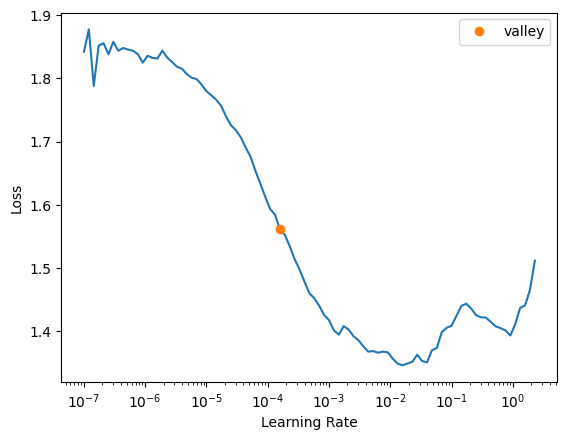

In [ ]:

device = "cuda:0" if torch.cuda.is_available() else "cpu"
# Задайте путь к папкам train и test
train_data_path = '/content/train_data'
test_data_path = '/content/test_data'

# Загрузите данные
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = ImageFolder(train_data_path, transform=transform)
test_dataset = ImageFolder(test_data_path, transform=transform)

# Задайте DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.001
max_epochs = 16
moms = (0.95, 0.85, 0.95)

# Загрузите предварительно обученную модель RegNetY
model = models.resnet18(num_classes=5).to(device)

dls = DataLoaders(train_dataloader, test_dataloader)

save_model_callback = SaveModelCallback(monitor='accuracy', fname='best_model')

learn = Learner(dls, model, loss_func=loss_fn, opt_func=Adam, metrics=accuracy, cbs=[save_model_callback])

learn.lr_find()
max_epochs = 10

learn.fit_one_cycle(max_epochs, lr_max=learning_rate, moms=moms, pct_start=0.4)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Сохранение лучших весов в папке гугл

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

local_path = '/content/models/best_model.pth'
drive_path = '/content/drive/MyDrive/bm.pth'

# Переместить файл на Google Drive
shutil.move(local_path, drive_path)

'/content/drive/MyDrive/bm.pth'

In [ ]:
save_model_callback = SaveModelCallback(monitor='accuracy', fname='/content/drive/MyDrive/best_model')
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth'))

Вычисление точности лучшей модели

In [ ]:
from fastai.metrics import accuracy as fastai_accuracy
import torch

def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model
    model.eval()
    total_accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images, labels
        with torch.no_grad():
            outputs = model(images)
            acc_batch = fastai_accuracy(outputs, labels)
        total_accuracy += acc_batch
    average_accuracy = total_accuracy / len(test_dataloader)
    return average_accuracy

accuracy = evaluate_task(model, test_dataloader)
accuracy


100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


array(0.41935483, dtype=float32)

In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
import os
import imghdr  # Модуль для определения типа изображения

# Путь к папке с изображениями
images_folder = '/content/train_data'

# Папка для сохранения обнаруженных изображений
output_detected_folder = '/content/detected_images'
os.makedirs(output_detected_folder, exist_ok=True)

for image_name in os.listdir(images_folder):
    image_path = os.path.join(images_folder, image_name)

    # Проверка, является ли файл изображением
    if os.path.isfile(image_path) and imghdr.what(image_path) is not None:
        image = cv2.imread(image_path)

        # Проверка на успешное чтение изображения
        if image is not None:
            bbox, label, conf = cv.detect_common_objects(image)
            output_image = draw_bbox(image, bbox, label, conf)

            # Сохраните изображение с обнаруженными объектами
            cv2.imwrite(os.path.join(output_detected_folder, image_name), output_image)
        else:
            print(f"Не удалось прочитать изображение: {image_path}")
    else:
        print(f"Пропуск файла, не являющегося изображением: {image_path}")


Пропуск файла, не являющегося изображением: /content/train_data/перерыв
Пропуск файла, не являющегося изображением: /content/train_data/простой
Пропуск файла, не являющегося изображением: /content/train_data/обед
Пропуск файла, не являющегося изображением: /content/train_data/вынужденная
Пропуск файла, не являющегося изображением: /content/train_data/сварка


In [ ]:
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import torch

# Загрузка предобученной модели
model = models.regnet_y_800mf(pretrained=True)

# Заморозка параметров
for param in model.parameters():
    param.requires_grad = False

# Изменение последнего слоя для вашего числа классов
num_classes = 5  # Замените на количество ваших классов
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Пример загрузки данных (вам, вероятно, придется настроить это в соответствии с вашей структурой данных)
# train_dataset = YourDataset(train_folder, transform=transforms.Compose([transforms.ToTensor()]))
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Оценка производительности модели на тестовом наборе
# (Вам также придется настроить это в соответствии с вашей структурой данных)
# test_dataset = YourDataset(test_folder, transform=transforms.Compose([transforms.ToTensor()]))
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy}')